# Finance Stock Analysis

This project focused on Exploratory Data Analysis of stock prices of the following banks;
* Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

The analysis addressed;
* Close price of each stock from 2017 through 2021
* Stock price during Pandemic(2020)
* Close price of Bank of American stock in 2020
* Getting the percentage change of all bank stock prices compared to the previous day(close price) from 2017:2021

In [85]:
#import needed libraries

from pandas_datareader import data, wb
import pandas as pd
import seaborn as sns
import numpy as np
import datetime
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('whitegrid')

In [87]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [89]:
import cufflinks as cf
init_notebook_mode(connected=True)
cf.go_offline()

In [60]:
start = datetime.datetime(2017,1,1)
end = datetime.datetime(2021,1,1)

In [61]:
# Extracting stock data from Jan 1st 2017 to Dec 1st 2021 for each of these banks.

BAC = data.DataReader('BAC', 'yahoo', start, end)
C = data.DataReader('C', 'yahoo', start, end)
GS = data.DataReader('GS', 'yahoo', start, end)
JPM = data.DataReader('JPM', 'yahoo', start, end)
MS = data.DataReader('MS', 'yahoo', start, end)
WFC = data.DataReader('WFC', 'yahoo', start, end)

In [73]:
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

In [13]:
bank_stocks = pd.concat([BAC, C, GS, JPM, MS, WFC], axis=1, keys=tickers)

In [36]:
bank_stocks.head()

Bank Ticker        BAC                                               \
Stock Info        High        Low       Open      Close      Volume   
Date                                                                  
2017-01-03   22.680000  22.200001  22.600000  22.530001  99298100.0   
2017-01-04   22.959999  22.600000  22.719999  22.950001  76875100.0   
2017-01-05   22.930000  22.350000  22.820000  22.680000  86826400.0   
2017-01-06   22.850000  22.559999  22.780001  22.680000  66281500.0   
2017-01-09   22.709999  22.400000  22.510000  22.549999  75901500.0   

Bank Ticker                     C                                   ...  \
Stock Info   Adj Close       High        Low       Open      Close  ...   
Date                                                                ...   
2017-01-03   20.131842  61.090000  59.750000  60.680000  60.590000  ...   
2017-01-04   20.507137  61.630001  60.610001  60.689999  61.410000  ...   
2017-01-05   20.265877  61.430000  59.910000  60.970001  60.340000  ...   
2017-01-06   20.265877  60.840000  60.080002  60.680000  60.549999  ...   
2017-01-09   20.149714  60.639999  59.669998  60.150002  60.220001  ...   

Bank Ticker         MS                                          WFC  \
Stock Info        Open      Close      Volume  Adj Close       High   
Date                                                                  
2017-01-03   43.090000  43.049999   8316900.0  37.481106  56.349998   
2017-01-04   43.299999  43.619999   7747400.0  37.977371  56.310001   
2017-01-05   43.529999  43.220001   9883200.0  37.629120  55.820000   
2017-01-06   43.560001  43.849998   9152800.0  38.177624  55.570000   
2017-01-09   43.490002  42.709999  11104000.0  37.185089  54.810001   

Bank Ticker                                                          
Stock Info         Low       Open      Close      Volume  Adj Close  
Date                                                                 
2017-01-03   55.459999  55.669998  56.000000  22063800.0  47.767555  
2017-01-04   55.610001  56.160000  56.049999  15036100.0  47.810211  
2017-01-05   54.480000  55.490002  55.180000  18831600.0  47.068104  
2017-01-06   54.700001  55.259998  55.040001  18715900.0  46.948685  
2017-01-09   54.180000  54.680000  54.240002  21794100.0  46.266293  

[5 rows x 36 columns]

In [16]:
bank_stocks.columns.names = ('Bank Ticker', 'Stock Info')

In [18]:
# showing the head/upper part of the bank_stocks Dataframe

bank_stocks.head()

Bank Ticker        BAC                                               \
Stock Info        High        Low       Open      Close      Volume   
Date                                                                  
2017-01-03   22.680000  22.200001  22.600000  22.530001  99298100.0   
2017-01-04   22.959999  22.600000  22.719999  22.950001  76875100.0   
2017-01-05   22.930000  22.350000  22.820000  22.680000  86826400.0   
2017-01-06   22.850000  22.559999  22.780001  22.680000  66281500.0   
2017-01-09   22.709999  22.400000  22.510000  22.549999  75901500.0   

Bank Ticker                     C                                   ...  \
Stock Info   Adj Close       High        Low       Open      Close  ...   
Date                                                                ...   
2017-01-03   20.131842  61.090000  59.750000  60.680000  60.590000  ...   
2017-01-04   20.507137  61.630001  60.610001  60.689999  61.410000  ...   
2017-01-05   20.265877  61.430000  59.910000  60.970001  60.340000  ...   
2017-01-06   20.265877  60.840000  60.080002  60.680000  60.549999  ...   
2017-01-09   20.149714  60.639999  59.669998  60.150002  60.220001  ...   

Bank Ticker         MS                                          WFC  \
Stock Info        Open      Close      Volume  Adj Close       High   
Date                                                                  
2017-01-03   43.090000  43.049999   8316900.0  37.481106  56.349998   
2017-01-04   43.299999  43.619999   7747400.0  37.977371  56.310001   
2017-01-05   43.529999  43.220001   9883200.0  37.629120  55.820000   
2017-01-06   43.560001  43.849998   9152800.0  38.177624  55.570000   
2017-01-09   43.490002  42.709999  11104000.0  37.185089  54.810001   

Bank Ticker                                                          
Stock Info         Low       Open      Close      Volume  Adj Close  
Date                                                                 
2017-01-03   55.459999  55.669998  56.000000  22063800.0  47.767555  
2017-01-04   55.610001  56.160000  56.049999  15036100.0  47.810211  
2017-01-05   54.480000  55.490002  55.180000  18831600.0  47.068104  
2017-01-06   54.700001  55.259998  55.040001  18715900.0  46.948685  
2017-01-09   54.180000  54.680000  54.240002  21794100.0  46.266293  

[5 rows x 36 columns]

# Exploratory Data Analysis

In [151]:
# Close Price for each stock from 2017:2012 (using iplot)

bank_stocks.xs(key='Close', axis=1, level='Stock Info').iplot()

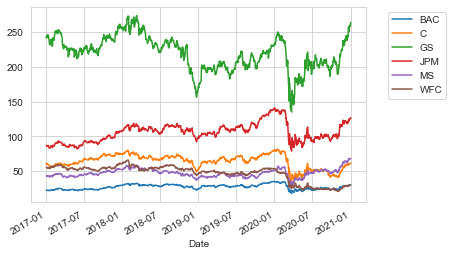

In [155]:
# Close Price for each stock from 2017:2012

bank_stocks.xs(key='Close', axis=1, level='Stock Info').plot()
plt.legend(loc=2, bbox_to_anchor=(1.05, 1))

In [158]:
# Maximum Close Price for each stock from 2017:2021

bank_stocks.xs(key='Close', axis=1, level='Stock Info').max()

Bank Ticker
BAC     35.639999
C       81.910004
GS     273.380005
JPM    141.089996
MS      68.529999
WFC     65.930000
dtype: float64

<AxesSubplot:xlabel='Bank Ticker'>

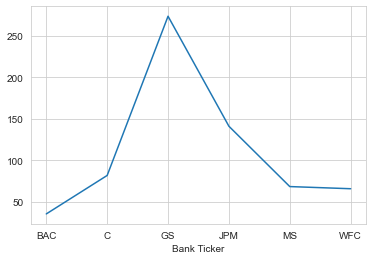

In [159]:
# Maximum Close Price for each stock from 2017:2021

bank_stocks.xs(key='Close', axis=1, level='Stock Info').max().plot()

In [160]:
# Minimum Close Price for each stock from 2017:2012

bank_stocks.xs(key='Close', axis=1, level='Stock Info').min()

Bank Ticker
BAC     18.080000
C       35.389999
GS     134.970001
JPM     79.029999
MS      27.809999
WFC     21.139999
dtype: float64

<AxesSubplot:xlabel='Bank Ticker'>

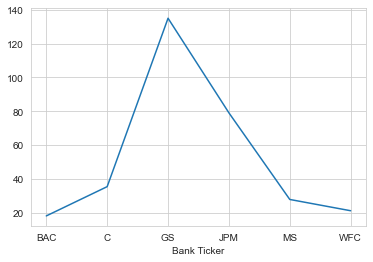

In [161]:
# Minimum Close Price for each stock from 2017:2012

bank_stocks.xs(key='Close', axis=1, level='Stock Info').min().plot()

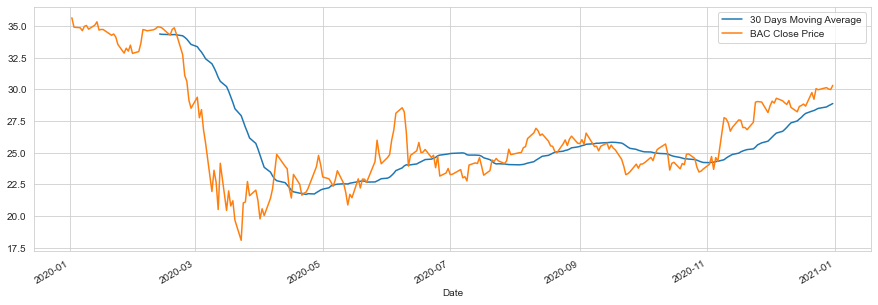

In [122]:
# Moving average of Bank Of American stocks in 2020

plt.figure(figsize=(15,5))
BAC['Close'].loc['2020-01-01':'2020-12-31'].rolling(window=30).mean().plot(label='30 Days Moving Average')
BAC['Close'].loc['2020-01-01':'2020-12-31'].plot(label='BAC Close Price')
plt.legend()

In [134]:
# Candle plot of Bank of American stock in 2020

BAC[['High', 'Low', 'Open', 'Close']].loc['2020-01-01':'2020-12-31'].iplot(kind='candle')

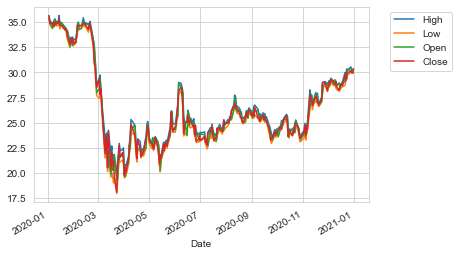

In [141]:
# plot of Bank of American stock in 2020

BAC[['High', 'Low', 'Open', 'Close']].loc['2020-01-01':'2020-12-31'].plot()
plt.legend(loc=2, bbox_to_anchor=(1.05, 1))

In [72]:
# Creating a new Dataframe

returns = pd.DataFrame()

In [74]:
# inserting the bank_stocks(Close price) stock into 'returns' Dataframe

for tick in tickers:
    returns[tick+' Return'] = bank_stocks[tick]['Close']
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2017-01-03,22.530001,60.590000,241.570007,87.230003,43.049999,56.000000
2017-01-04,22.950001,61.410000,243.130005,86.910004,43.619999,56.049999
2017-01-05,22.680000,60.340000,241.320007,86.110001,43.220001,55.180000
2017-01-06,22.680000,60.549999,244.899994,86.120003,43.849998,55.040001
2017-01-09,22.549999,60.220001,242.889999,86.180000,42.709999,54.240002


In [76]:
# Getting the percentage change from the immediately previous row/day(close price). 

returns.pct_change().head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2017-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-04,0.018642,0.013534,0.006458,-0.003668,0.013240,0.000893
2017-01-05,-0.011765,-0.017424,-0.007445,-0.009205,-0.009170,-0.015522
2017-01-06,0.000000,0.003480,0.014835,0.000116,0.014577,-0.002537
2017-01-09,-0.005732,-0.005450,-0.008207,0.000697,-0.025998,-0.014535


In [96]:
# Date that have the worst drop price between 2017:2021
# From the result, stock had a familiar drop march 2020 which is during Pandemic

returns.idxmin()

BAC Return   2020-03-23
C Return     2020-03-23
GS Return    2020-03-23
JPM Return   2020-03-23
MS Return    2020-03-23
WFC Return   2020-10-29
dtype: datetime64[ns]

In [78]:
# Days that have the best gain(bull) price between 2017:2021

returns.idxmax()

BAC Return   2020-01-02
C Return     2020-01-14
GS Return    2018-03-12
JPM Return   2020-01-02
MS Return    2020-12-31
WFC Return   2018-01-26
dtype: datetime64[ns]